In [10]:
from osgeo import gdal

# Path of netCDF file
netcdf_name = "g4.timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc"

ds = gdal.Open(netcdf_name)

for key, value in ds.GetMetadata().items():
    print("{:35}: {}".format(key, value))

lat#bounds                         : lat_bnds
lat#standard_name                  : latitude
lat#units                          : degrees_north
lon#bounds                         : lon_bnds
lon#standard_name                  : longitude
lon#units                          : degrees_east
NC_GLOBAL#Conventions              : CF-1.4
NC_GLOBAL#end_time                 : 2019-01-31T23:59:59Z
NC_GLOBAL#history                  : Tue Nov 16 18:58:29 2021: /usr/bin/ncks -O -x -v time_bnds timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc
Tue Nov 16 18:58:28 2021: /usr/bin/ncatted -a valid_range,,d,, -O -o timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc
Tue Nov 16 18:58:28 2021: /usr/bin/ncatted -O -a title,global,o,c,TRMM_3B43_7_precipitation Averaged over 1998-01-01 to 2021-12-31 time

In [11]:
for item in ds.GetSubDatasets():
    print(item[0])

NETCDF:"g4.timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc":TRMM_3B43_7_precipitation
NETCDF:"g4.timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc":lat_bnds
NETCDF:"g4.timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc":lon_bnds


In [15]:
band2 = gdal.Open(ds.GetSubDatasets()[0][0])
print('Band shape (T, Y, X): ', (band2.RasterCount, band2.RasterYSize, band2.RasterXSize))

Band shape (T, Y, X):  (1, 25, 28)


In [23]:
geoTransform = band2.GetGeoTransform()
minx = geoTransform[0]
maxy = geoTransform[3]
maxx = minx + geoTransform[1]*band2.RasterXSize
miny = maxy + geoTransform[5]*band2.RasterYSize
print("Spatial extent [minx,miny,maxx,maxy]: ", [minx,miny,maxx,maxy])

Spatial extent [minx,miny,maxx,maxy]:  [34.75, -3.25, 41.75, 3.0]


In [30]:
band2.GetMetadata()

{'lat#bounds': 'lat_bnds',
 'lat#standard_name': 'latitude',
 'lat#units': 'degrees_north',
 'lon#bounds': 'lon_bnds',
 'lon#standard_name': 'longitude',
 'lon#units': 'degrees_east',
 'NC_GLOBAL#Conventions': 'CF-1.4',
 'NC_GLOBAL#end_time': '2019-01-31T23:59:59Z',
 'NC_GLOBAL#history': 'Tue Nov 16 18:58:29 2021: /usr/bin/ncks -O -x -v time_bnds timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc\nTue Nov 16 18:58:28 2021: /usr/bin/ncatted -a valid_range,,d,, -O -o timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc\nTue Nov 16 18:58:28 2021: /usr/bin/ncatted -O -a title,global,o,c,TRMM_3B43_7_precipitation Averaged over 1998-01-01 to 2021-12-31 timeAvg.TRMM_3B43_7_precipitation.19980101-20211231.MONTH_01.34E_3S_41E_3N.nc\nTue Nov 16 18:58:28 2021: /usr/bin/ncks -x -v time -o time

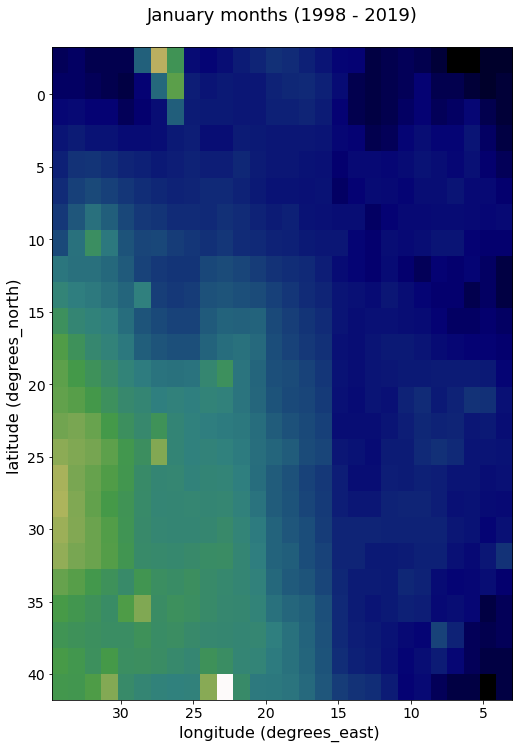

In [34]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12,12))

# Subset indices
x1, x2 = 1000,3999
y1, y2 = 0,3000
t1 = 9

# Plot data subset with equal axes and colorbar
plt.imshow(band2.ReadAsArray()[:], extent=[minx,maxy,maxx,miny], cmap='gist_earth')

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(band2.GetMetadata()['NC_GLOBAL#plot_hint_title']+'\n', fontsize=18)
plt.xlabel(band2.GetMetadata()['lon#standard_name']+' ('+band2.GetMetadata()['lon#units']+') ', fontsize=16)
plt.ylabel(band2.GetMetadata()['lat#standard_name']+' ('+band2.GetMetadata()['lat#units']+') ', fontsize=16)

# Adjust tick mark size
plt.tick_params(labelsize=14)